In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
X =  np.array([[1,2,3], [4,5,6]])
print(X)

[[1 2 3]
 [4 5 6]]


In [3]:
# S is vector which containes sorted singular values
U, S, VT = np.linalg.svd(X)
V = VT.T
Sigma = np.zeros(X.shape)
for ss in range(0, S.shape[0]):
    Sigma[ss, ss] = S[ss]
print(U.shape, VT.shape)

(2, 2) (3, 3)


In [5]:
X_SVD = U@Sigma@V.T

In [7]:
print(X_SVD)

[[1. 2. 3.]
 [4. 5. 6.]]


In [8]:
print(U)

[[-0.3863177  -0.92236578]
 [-0.92236578  0.3863177 ]]


In [10]:
[Lam, E] = np.linalg.eig(X@X.T)
Lam = np.real(Lam) # eigen value vector
E = np.real(E) # eigen vector matrix
index = Lam.argsort()[::-1]
Lam = Lam[index]
E = E[:, index]
L = np.diag(Lam)
print(E)

[[-0.3863177  -0.92236578]
 [-0.92236578  0.3863177 ]]


In [11]:
print(Sigma)

[[9.508032   0.         0.        ]
 [0.         0.77286964 0.        ]]


In [12]:
print(np.sqrt(L))

[[9.508032   0.        ]
 [0.         0.77286964]]


In [15]:
tokyo_temp = np.genfromtxt("Tokyo_temp.csv", delimiter=",", usecols=(0, 1, 2))
utsu_temp = np.genfromtxt("Utsunomiya_temp.csv", delimiter=",", usecols=(0,1,2))

y = tokyo_temp[:,0]
m = tokyo_temp[:,1]
tokyo = tokyo_temp[:, 2]
utsu = utsu_temp[:, 2]

tokyo = tokyo[(1990<=y)*(y<=2019)]
utsu = utsu[(1990<=y)*(y<=2019)]
m = m[(1990<=y)*(y<=2019)]
y = y[(1990<=y)*(y<=2019)]

tokyoc = np.zeros((12))
utsuc = np.zeros((12))

for mm in range(1, 13):
    tokyoc[mm-1] = np.nanmean(tokyo[m==mm], 0)
    utsuc[mm-1] = np.nanmean(utsu[m==mm], 0)

tokyoa = np.zeros((tokyo.shape))
utsua = np.zeros((utsu.shape))
for yy in range(1990, 2020):
    for mm in range(1, 13):
        tokyoa[(y==yy)*(m==mm)] = tokyo[(y==yy)*(m==mm)] - tokyoc[mm-1]
        utsua[(y==yy)*(m==mm)] = utsu[(y==yy)*(m==mm)] - utsuc[mm-1]

tokyoa = signal.detrend(tokyoa)
utsua = signal.detrend(utsua)

X = np.array([tokyoa, utsua])

In [16]:
N = tokyoa.shape[0]
C = X@X.T/N

In [17]:
[Lam, E] = np.linalg.eig(C)
index = Lam.argsort()[::-1]
Lam = Lam[index]
E = E[:, index]
L = np.diag(Lam)
print(E) # PC時系列を並べた状列
print(L) # 対角成分に大きい順に固有値の入った行列

[[-0.69771535 -0.7163751 ]
 [-0.7163751   0.69771535]]
[[2.05139247 0.        ]
 [0.         0.06501294]]


In [19]:
U, S, VT = np.linalg.svd(C)
V = VT.T
Sigma = np.zeros(C.shape)
for ss in range(0, C.shape[0]):
    Sigma[ss, ss] = S[ss]
print(U)
print(Sigma) #特異値を対角状列に並べる
print(V) # U=Vになっている

[[-0.69771535 -0.7163751 ]
 [-0.7163751   0.69771535]]
[[2.05139247 0.        ]
 [0.         0.06501294]]
[[-0.69771535 -0.7163751 ]
 [-0.7163751   0.69771535]]


In [20]:
U, S, VT = np.linalg.svd(X)
V = VT.T
Sigma = np.zeros(X.shape)
for ss in range(0, X.shape[0]):
    Sigma[ss, ss] = S[ss]

print(U)

[[-0.69771535 -0.7163751 ]
 [-0.7163751   0.69771535]]


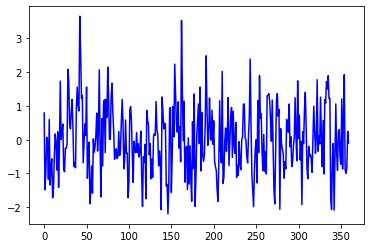

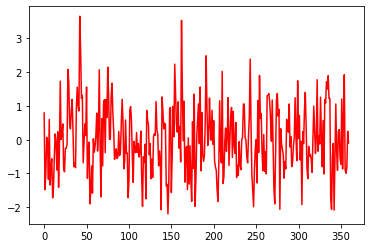

In [21]:
Z = E.T@X
pc1_eig = Z[0,:]
pc1_eig = pc1_eig/np.std(pc1_eig)
pc1_svd = V[:,0]
pc1_svd = pc1_svd/np.std(pc1_svd)

plt.plot(pc1_eig, 'b')
plt.show()
plt.plot(pc1_svd, 'r')
plt.show()